![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [5]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


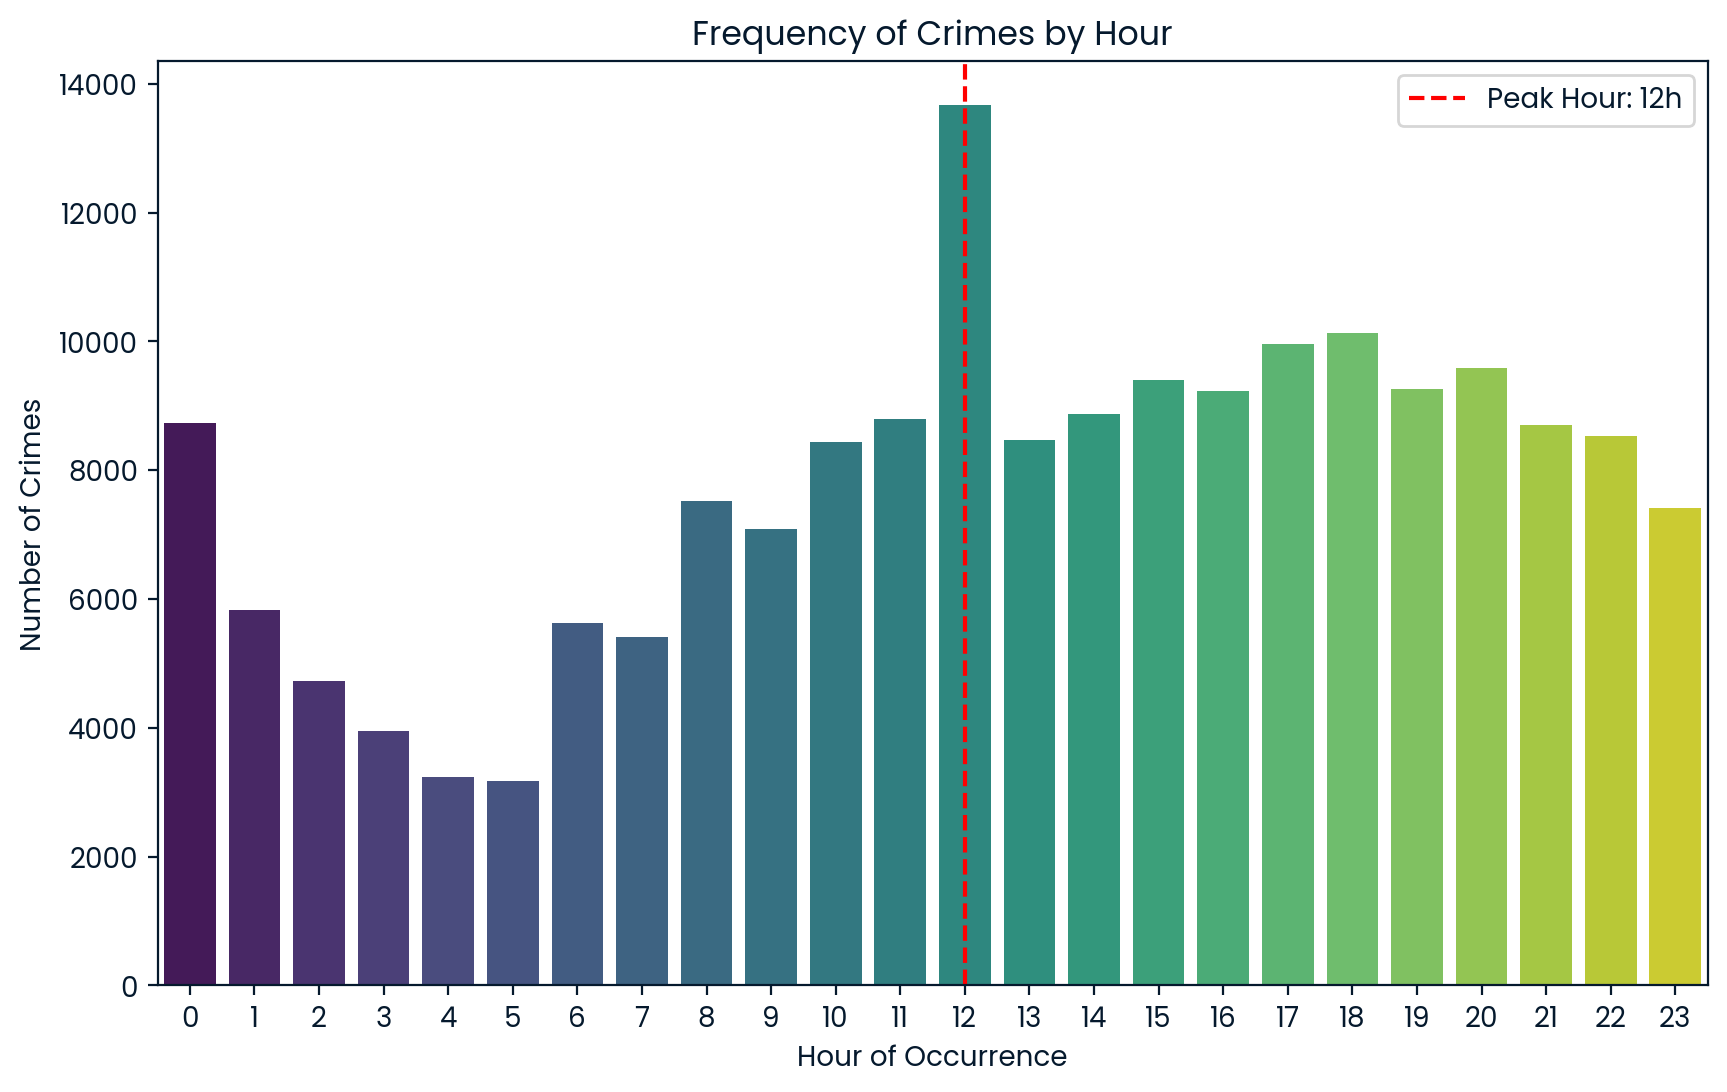

In [6]:
# Extract the hour from the "TIME OCC" column and convert it to an integer
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# Find the hour with the highest frequency of crimes
peak_crime_hour = crimes['HOUR OCC'].mode()[0]

# Plot the frequency of crimes by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='HOUR OCC', data=crimes, palette='viridis')
plt.axvline(x=peak_crime_hour, color='red', linestyle='--', label=f'Peak Hour: {peak_crime_hour}h')
plt.title('Frequency of Crimes by Hour')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


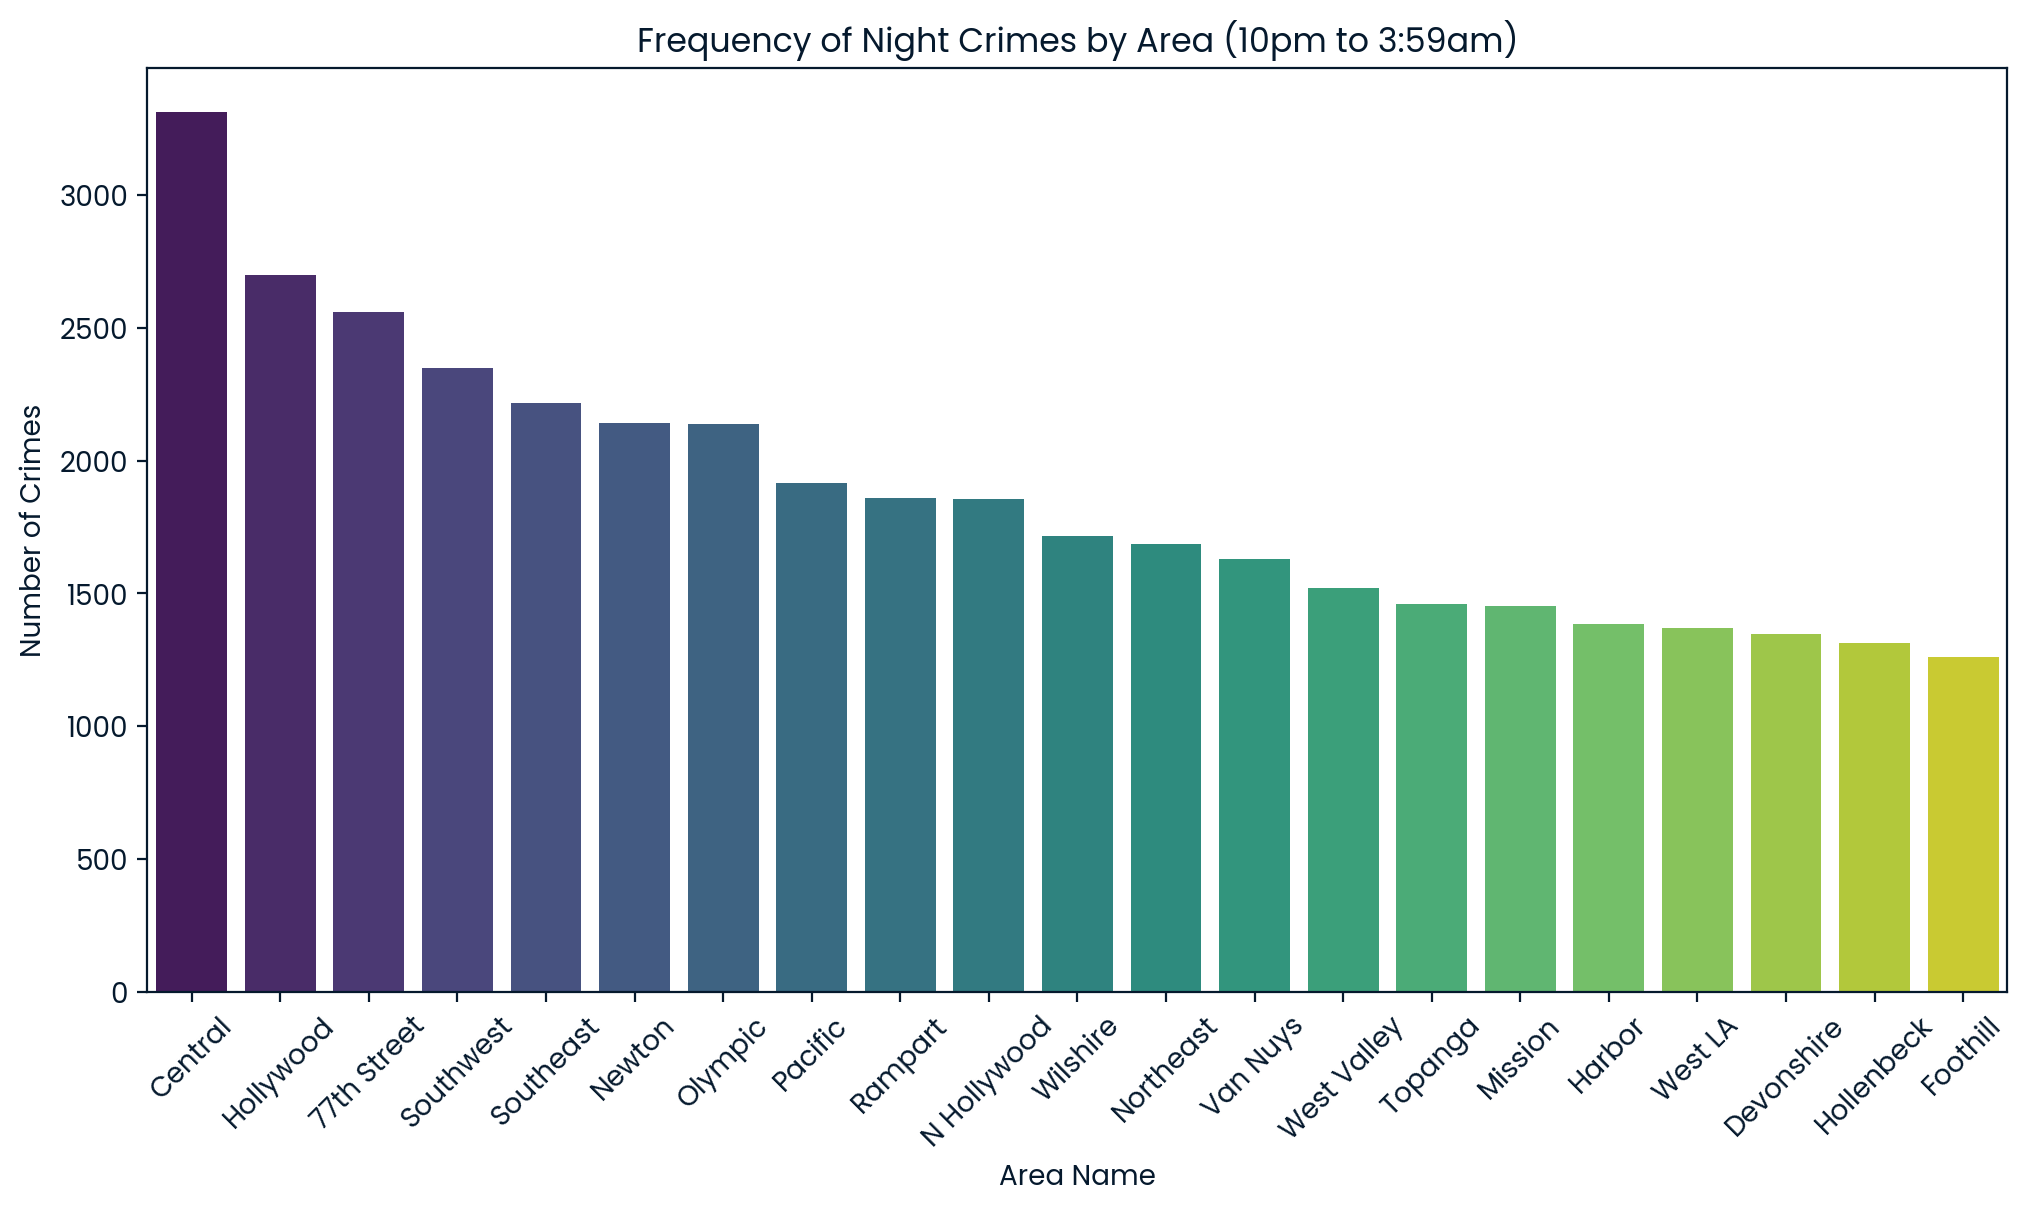

In [7]:
# Define the range for night crimes (10pm to 3:59am)
night_crime_hours = list(range(22, 24)) + list(range(0, 4))

# Filter the dataframe for night crimes
night_crimes = crimes[crimes['HOUR OCC'].isin(night_crime_hours)]

# Count the frequency of night crimes by area
night_crime_counts = night_crimes['AREA NAME'].value_counts().reset_index()
night_crime_counts.columns = ['AREA NAME', 'COUNT']

# Find the area with the largest frequency of night crimes
peak_night_crime_location = night_crime_counts.loc[night_crime_counts['COUNT'].idxmax(), 'AREA NAME']

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='AREA NAME', y='COUNT', data=night_crime_counts, palette='viridis')
plt.title('Frequency of Night Crimes by Area (10pm to 3:59am)')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

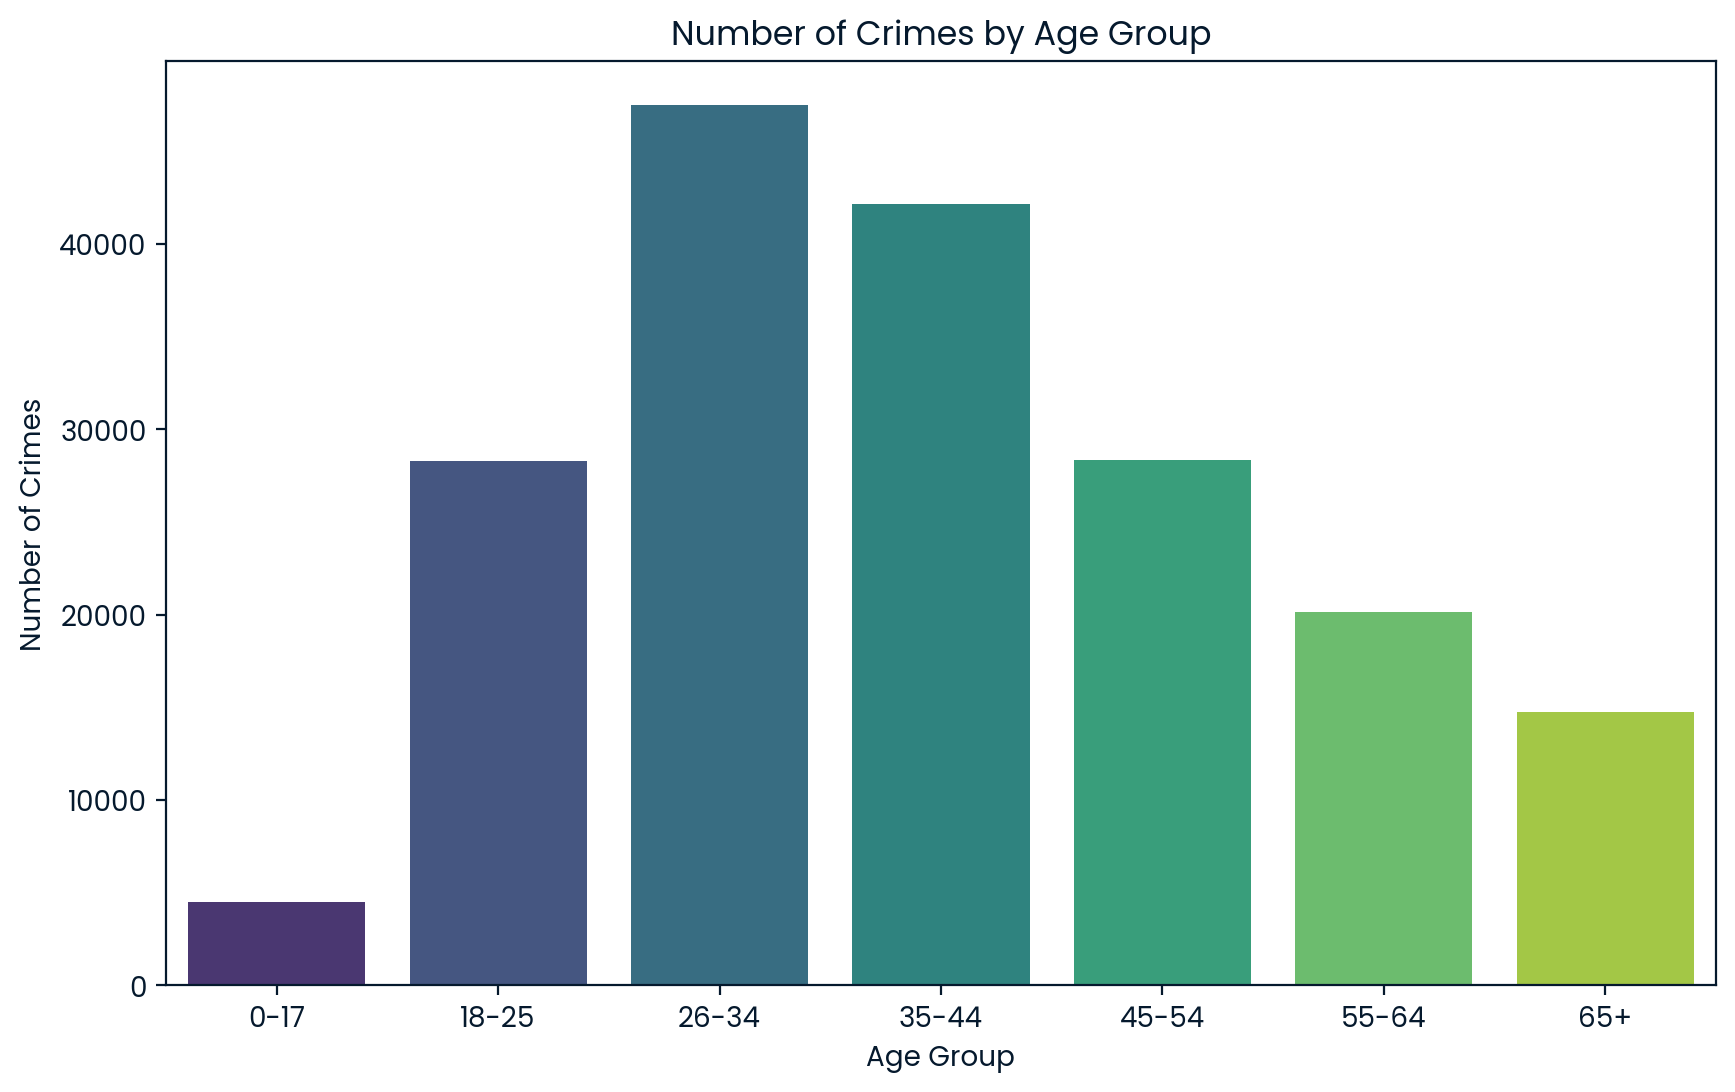

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age groups
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
age_bins = [0, 18, 26, 35, 45, 55, 65, np.inf]

# Create a new column for age groups
crimes['AGE GROUP'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of crimes for each age group
victim_ages = crimes['AGE GROUP'].value_counts().sort_index()

# Create a DataFrame for plotting
plot_data = victim_ages.reset_index()
plot_data.columns = ['AGE GROUP', 'COUNT']

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='AGE GROUP', y='COUNT', palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Age Group')
plt.show()